In [ ]:
import os 
import pandas as pd
import re
import numpy as np

In [ ]:
def get_type(x):
    return re.search(name_pattern,x).group(1)

def get_probability(x):
    if re.search(probability_pattern,x):
        return re.search(probability_pattern,x).group(0)

In [ ]:
name_pattern = '(?s:.*)(ssl|init|lfs|delay)'
probability_pattern  = '\d\.\d{1,2}'
def prepare_logs(logs_file):

    # read data
    res = pd.read_csv(os.path.join('logs',logs_file),header= None)

    # renaming columns
    res = res.rename(columns={0:'stream',1:'hyperparameters',2:'B',3:'frequency'})
    res['hyperparameters'] = res['hyperparameters'].apply(lambda x: dict([i.split(";") for i in re.findall( '\((.*?)\)',x)]))
    B = res['B'].iloc[0]
    cl = res.iloc[:,B+6:].columns
    res = res.rename(columns = dict(zip(res.columns[4:B+6],[f"B_{i}" for i in range(1,B+3)])))
    res = res.rename(columns = dict(zip(cl,[f"m_{i}" for i in range(len(cl))])))

    # adding new columns
    res['date'] = res['stream'].apply(lambda x: x.split(' - ')[0])
    res['stream'] = res['stream'].apply(lambda x: x.split(' - ')[1])
    res['type'] = res['stream'].apply(lambda x :  get_type(x))
    res['probability'] = res['stream'].apply(lambda x :  get_probability(x))
    res['threshold'] = res['hyperparameters'].apply(lambda x : x['threshold'])

    #change order
    new_order = list(res.columns[:2])
    new_order.extend(res.columns[-4:])
    new_order.extend(res.columns[2:-4])
    res = res[new_order]

    return res


In [ ]:
def save_formatted_logs(res,file):
    res.to_csv(os.path.join("logs_formatted",file),index = False)

In [ ]:
def concatenate_res(res,file):
    new_res = pd.read_csv(os.path.join("logs_formatted",file))
    res = pd.concat([new_res,res])
    res.to_csv(os.path.join("logs_formatted",file),index = False)

In [ ]:
logs_file = os.listdir('logs')[1]

In [ ]:
os.listdir('logs')

['15_04_2023_13_55_29.log',
 '15_04_2023_14_29_09.log',
 '16_04_2023_15_43_43.log',
 '16_04_2023_16_32_33.log']

In [ ]:
stoplogs_file

'15_04_2023_17_16_27.log'

In [ ]:
logs_file = os.listdir('logs')[1]
res = prepare_logs(logs_file)
res

,stream,hyperparameters,date,type,probability,threshold,B,frequency,B_1,B_2,...,m_390,m_391,m_392,m_393,m_394,m_395,m_396,m_397,m_398,m_399
0,LED_gradual_constant_delay_lfs_0.1_0_20000,"{'grace_period': '200', 'max_depth': 'inf', 's...",15-Apr-23 13:58:39,lfs,0.1,0.6,50,100,0.000000,0.000000,...,,,,,,,,,,
1,LED_gradual_constant_delay_lfs_0.1_0_20000,"{'grace_period': '200', 'max_depth': 'inf', 's...",15-Apr-23 14:02:11,lfs,0.1,0.5,50,100,0.000000,0.000000,...,,,,,,,,,,
2,initail_LED_Drift_gradual,"{'grace_period': '200', 'max_depth': 'inf', 's...",15-Apr-23 14:02:26,init,None,0.6,50,100,0.000000,0.000000,...,,,,,,,,,,
3,LED_gradual_constant_delay_lfs_0.1_0_20000,"{'grace_period': '200', 'max_depth': 'inf', 's...",15-Apr-23 14:05:22,lfs,0.1,0.4,50,100,0.000000,0.000000,...,,,,,,,,,,
4,initail_LED_Drift_gradual,"{'grace_period': '200', 'max_depth': 'inf', 's...",15-Apr-23 14:07:52,init,None,0.5,50,100,0.000000,0.000000,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,LED_gradual_constant_delay_ssl_0.1_0_20000,"{'n_models': '10', 'max_features': '5', 'lambd...",16-Apr-23 19:32:08,ssl,0.1,0.4,50,100,0.319618,0.152621,...,,,,,,,,,,
68,LED_gradual_constant_delay_ssl_0.2_0_20000,"{'n_models': '10', 'max_features': '5', 'lambd...",16-Apr-23 22:23:07,ssl,0.2,0.5,50,100,0.589778,0.526990,...,,,,,,,,,,
69,LED_gradual_constant_delay_ssl_0.5_0_20000,"{'n_models': '10', 'max_features': '5', 'lambd...",16-Apr-23 23:26:28,ssl,0.5,0.5,50,100,0.589141,0.522189,...,,,,,,,,,,
70,LED_gradual_constant_delay_ssl_0.2_0_20000,"{'n_models': '10', 'max_features': '5', 'lambd...",17-Apr-23 01:28:43,ssl,0.2,0.4,50,100,0.369478,0.215624,...,,,,,,,,,,


In [ ]:
res.iloc[48:][['type','probability','threshold']].sort_values(['type','probability'])

,type,probability,threshold
60,delay,None,0.6
62,delay,None,0.5
63,delay,None,0.4
50,init,None,0.6
53,init,None,0.5
56,init,None,0.4
48,lfs,0.1,0.6
49,lfs,0.1,0.5
51,lfs,0.1,0.4
52,lfs,0.2,0.6


In [ ]:
dict(res.iloc[0])

{'stream': 'LED_gradual_constant_delay_lfs_0.1_0_20000',
 'hyperparameters': {'grace_period': '200',
  'max_depth': 'inf',
  'split_criterion': 'info_gain',
  'delta': '1e-07',
  'tau': '0.05',
  'leaf_prediction': 'nba',
  'nb_threshold': '0',
  'nominal_attributes': 'None',
  'splitter': 'GaussianSplitter',
  'bootstrap_sampling': 'True',
  'drift_window_threshold': '300',
  'drift_detector': 'ADWIN',
  'switch_significance': '0.05',
  'binary_split': 'False',
  'max_size': '100.0',
  'memory_estimate_period': '1000000',
  'stop_mem_management': 'False',
  'remove_poor_attrs': 'False',
  'merit_preprune': 'True',
  'seed': 'None',
  'threshold': '0.6',
  'train_period': '0',
  'classifier': "<class 'river.tree.hoeffding_adaptive_tree_classifier.HoeffdingAdaptiveTreeClassifier'>"},
 'date': '15-Apr-23 13:58:39',
 'type': 'lfs',
 'probability': '0.1',
 'threshold': '0.6',
 'B': 50,
 'frequency': 100,
 'B_1': 0.0,
 'B_2': 0.0,
 'B_3': 0.0,
 'B_4': 0.0,
 'B_5': 0.0,
 'B_6': 0.0,
 'B_7': 

In [ ]:
res.iloc[48:,:-200]

,stream,hyperparameters,date,type,probability,threshold,B,frequency,B_1,B_2,...,m_190,m_191,m_192,m_193,m_194,m_195,m_196,m_197,m_198,m_199
48,RBF_moderate_constant_delay_lfs_0.1_0_20000,"{'grace_period': '200', 'max_depth': 'inf', 's...",15-Apr-23 19:16:51,lfs,0.1,0.6,50,100,0.000000,0.000000,...,,,,,,,,,,
49,RBF_moderate_constant_delay_lfs_0.1_0_20000,"{'grace_period': '200', 'max_depth': 'inf', 's...",15-Apr-23 19:17:36,lfs,0.1,0.5,50,100,0.000000,0.000000,...,,,,,,,,,,
50,RBF_moderate_constant_delay_lfs_0.1_0_20000,"{'grace_period': '200', 'max_depth': 'inf', 's...",15-Apr-23 19:18:10,lfs,0.1,0.4,50,100,0.000000,0.000000,...,,,,,,,,,,
51,initail_RBF_moderate,"{'grace_period': '200', 'max_depth': 'inf', 's...",15-Apr-23 19:18:15,init,None,0.6,50,100,0.000000,0.000000,...,0.65,0.76,0.81,0.87,0.77,0.84,0.73,0.77,0.82,0.72
52,RBF_moderate_constant_delay_lfs_0.2_0_20000,"{'grace_period': '200', 'max_depth': 'inf', 's...",15-Apr-23 19:18:42,lfs,0.2,0.6,50,100,0.000000,0.000000,...,,,,,,,,,,
53,RBF_moderate_constant_delay_lfs_0.2_0_20000,"{'grace_period': '200', 'max_depth': 'inf', 's...",15-Apr-23 19:19:24,lfs,0.2,0.5,50,100,0.000000,0.000000,...,,,,,,,,,,
54,RBF_moderate_constant_delay_lfs_0.2_0_20000,"{'grace_period': '200', 'max_depth': 'inf', 's...",15-Apr-23 19:20:03,lfs,0.2,0.4,50,100,0.000000,0.000000,...,,,,,,,,,,
55,initail_RBF_moderate,"{'grace_period': '200', 'max_depth': 'inf', 's...",15-Apr-23 19:21:09,init,None,0.5,50,100,0.000000,0.000000,...,0.72,0.76,0.79,0.85,0.78,0.85,0.75,0.76,0.86,0.71
56,initail_RBF_moderate,"{'grace_period': '200', 'max_depth': 'inf', 's...",15-Apr-23 19:24:25,init,None,0.4,50,100,0.000000,0.000000,...,0.6,0.7,0.72,0.67,0.73,0.75,0.74,0.7,0.79,0.71
57,RBF_moderate_constant_delay_lfs_0.5_0_20000,"{'grace_period': '200', 'max_depth': 'inf', 's...",15-Apr-23 19:25:34,lfs,0.5,0.6,50,100,0.000000,0.000000,...,,,,,,,,,,


In [ ]:
concatenate_res(res.iloc[48:,:-200],"LED_gradual\\ARF.csv")

In [ ]:
save_formatted_logs(res.sort_values(['classifier','date']).drop_duplicates(subset = ['stream','classifier'],keep = 'last' ).iloc[14:,:-2],"RBF_moderate\MHT.csv")

In [ ]:
res.iloc[28]['hyperparameters']['classifier']

"<class 'river.naive_bayes.gaussian.GaussianNB'>"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tmp = res.iloc[:5,:]
to_keep = [col for col in tmp.columns if col.startswith('m')]
to_keep.append('stream')
tmp = tmp[to_keep]
tmp = tmp.melt(id_vars = 'stream')
tmp  = tmp.replace(" ",None)

# tmp[['value','variable']] = tmp[['value','variable']].apply(pd.to_numeric)
tmp = tmp.replace(0,None)

<Axes: xlabel='variable', ylabel='value'>

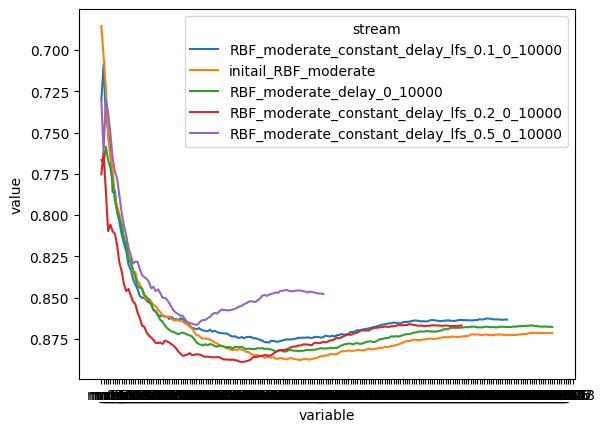

In [ ]:
sns.lineplot(tmp,x = 'variable',y = 'value',hue = 'stream')

In [ ]:
tmp  = pd.read_csv(os.path.join('logs_formatted','RBF','1.Delay_importance_RBF_NB_02.csv'))

In [ ]:
res = pd.concat([res,tmp])

In [ ]:
list(res.sort_values(by = 'date', ascending = False).iloc[0])

['RBF_moderate_constant_delay_ssl_0.5_0_20000',
 {'n_models': '10',
  'max_features': '3',
  'lambda_value': '6',
  'metric': 'Accuracy: 0.00%',
  'disable_weighted_vote': 'False',
  'drift_detector': 'ADWIN',
  'warning_detector': 'ADWIN',
  'grace_period': '50',
  'max_depth': 'None',
  'split_criterion': 'info_gain',
  'delta': '0.01',
  'tau': '0.05',
  'leaf_prediction': 'nba',
  'nb_threshold': '0',
  'nominal_attributes': 'None',
  'splitter': 'None',
  'binary_split': 'False',
  'max_size': '100.0',
  'memory_estimate_period': '2000000',
  'stop_mem_management': 'False',
  'remove_poor_attrs': 'False',
  'merit_preprune': 'True',
  'seed': 'None',
  'threshold': '0.7',
  'train_period': '0',
  'classifier': "<class 'river.forest.adaptive_random_forest.ARFClassifier'>"},
 0.7474502675956781,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.7528089887640449,
 0.7206896551724138,
 0.7346072186836518,
 0.0,
 0.0,
 0.7398457583547557,
 0.0,
 0.7528089887640449,
 0.0,
 0.7467870788468218,
 0.0

In [ ]:
res.to_csv(os.path.join('logs_formatted','RBF','1.Delay_importance_RBF_NB_02.csv'),index = False)

In [ ]:
logs_colab = pd.read_csv(os.path.join('logs','logs_01_04_2023_16_18_53.csv'), index_col=False).iloc[:,1:]
logs_colab['hyperparameters'] = logs_colab['hyperparameters'].apply(lambda x: dict([i.split(";") for i in re.findall( '\((.*?)\)',x)]))
logs_colab['threshold'] = logs_colab['hyperparameters'].apply(lambda x : x['threshold'])
logs_colab

FileNotFoundError: [Errno 2] No such file or directory: 'logs\\logs_01_04_2023_16_18_53.csv'

In [ ]:
res = pd.concat([logs_colab,res]).reset_index(drop=True)

In [ ]:
res.to_csv(os.path.join('logs_formatted','1.Delay_importance_NB_01.csv'),index = False)

In [ ]:
from my_datasets.getting_datasets import get_LED,get_Hyperplane,get_Electricity,get_AGRAWL,get_Airlines,get_CoverType,get_RandomRBF

In [ ]:
a = get_RandomRBF(n_centroids=500,change_speed  = 0.001)

In [ ]:
[x for x in a.take(100)]

[({0: 0.48812735875095725,
   1: 0.2612165255012504,
   2: 0.19626555050849456,
   3: 0.41198106808926804,
   4: 0.2697290119255046,
   5: 0.23721985922650693,
   6: 0.292941862736523,
   7: 0.43599041701702823,
   8: 0.1187725369769377,
   9: 0.9410242979950223},
  1),
 ({0: 0.0286253091781124,
   1: -0.06677713653489817,
   2: 0.4442638691129822,
   3: -0.052862625029035964,
   4: 0.8334765779414408,
   5: 0.0188967932815357,
   6: 0.6884050719001968,
   7: 0.18049263880088937,
   8: 0.7195521225490821,
   9: 0.26826160722001463},
  1),
 ({0: 1.0208399056549455,
   1: 0.04042852217768677,
   2: 0.1962352490339435,
   3: 0.337901093135501,
   4: 0.6855883584674927,
   5: 0.03596624749512578,
   6: 0.6498713608404145,
   7: 0.04152666350838011,
   8: 0.9249400292803096,
   9: 0.9451074489104764},
  0),
 ({0: 0.710202362660784,
   1: 0.9101931219181625,
   2: 0.7324024724538963,
   3: 0.17177949947932733,
   4: 0.040700483376572255,
   5: 0.7937138369619567,
   6: 0.3633714234001102,
  